### SparklyRGT Template: choiceRGT

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder (current working directory) 

**Getting started: Please make a copy of this (sparklyRGT_template_4) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation (ex. template_4 uses section 1 and 4) 
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)
import sparklyRGT as rgt 

In [2]:
%load_ext autoreload
%autoreload 2

***

# 1) Load data into Python



In [3]:
file_names = ['Free S33-37 Raw.xlsx'] 
df = rgt.load_data(file_names)
df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H4,Rew_Persev_H5,Lever_Latency,Uncued_Chosen,Cued_Chosen,Choice_Omit
0,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,1.0,...,0,0,0,0,0,0,6.97,1,0,0
1,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,2.0,...,0,0,0,0,0,0,2.78,0,1,0
2,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,3.0,...,0,0,0,0,0,0,2.29,0,1,0
3,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.1,...,1,5,0,0,0,0,5.48,0,1,0
4,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.0,...,0,0,0,0,0,0,1.30,0,1,0


# 4) Choice rGT

Set your variables!

In [4]:
#for plotting: 
title = 'Choice rGT' 

startsess = 33 #first session you would like to include in figures
endsess = 37 #last session you would like to include in figures

In [5]:
#This cell is optional if you want to split by group

males = [1,2,3,4,5] #rats 1 to 5

females = [6,7,8,9,10] #rats 6 to 10

group_names = {0: 'males',
              1: 'females'} 

group_list = [males,females]

## Data cleaning

In [6]:
# rgt.check_sessions(df)

In [7]:
# df2 = rgt.drop_sessions(df, [28])
# df2 = rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all") 

## Data processing

### Calculate variables for each rat


In [12]:
df_sum = rgt.get_summary_data(df, task = 'choiceRGT') #use df instead of df2 if you didn't do any session editing, v.v.
df_sum 

I am being executed!


,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,34P3_C,34P4_C,34P1_U,34P2_U,34P3_U,34P4_U,35P1_C,35P2_C,35P3_C,35P4_C,35P1_U,35P2_U,35P3_U,35P4_U,36P1_C,36P2_C,36P3_C,36P4_C,36P1_U,36P2_U,36P3_U,36P4_U,37P1_C,37P2_C,37P3_C,37P4_C,37P1_U,37P2_U,37P3_U,37P4_U,risk_cued_33,risk_uncued_33,risk_cued_34,risk_uncued_34,risk_cued_35,risk_uncued_35,risk_cued_36,risk_uncued_36,risk_cued_37,risk_uncued_37,co_lat_cued_33,co_lat_uncued_33,co_lat_cued_34,co_lat_uncued_34,co_lat_cued_35,co_lat_uncued_35,co_lat_cued_36,co_lat_uncued_36,co_lat_cued_37,co_lat_uncued_37,ch_lat_cued_33,ch_lat_uncued_33,ch_lat_cued_34,ch_lat_uncued_34,ch_lat_cued_35,ch_lat_uncued_35,ch_lat_cued_36,ch_lat_uncued_36,ch_lat_cued_37,ch_lat_uncued_37,cued_lev_lat33,uncued_lev_lat33,cued_lev_lat34,uncued_lev_lat34,cued_lev_lat35,uncued_lev_lat35,cued_lev_lat36,uncued_lev_lat36,cued_lev_lat37,uncued_lev_lat37,cued_omit_33,uncued_omit_33,lev_omit33,cued_omit_34,uncued_omit_34,lev_omit34,cued_omit_35,uncued_omit_35,lev_omit35,cued_omit_36,uncued_omit_36,lev_omit36,cued_omit_37,uncued_omit_37,lev_omit37,trial_init33,trial_init34,trial_init35,trial_init36,trial_init37,prem_cued_33,prem_uncued_33,prem_cued_34,prem_uncued_34,prem_cued_35,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37
1,22.9508,8.19672,68.8525,0,42.8571,0,42.8571,14.2857,24.1935,3.22581,72.5806,0,50,10,40,0,30.1587,1.5873,68.254,0,55.5556,0,44.4444,0,25,5.35714,69.6429,0,55.5556,0,44.4444,0,5,0,93.3333,1.66667,22.2222,0,77.7778,0,-37.7049,-14.2857,-45.1613,20,-36.5079,11.1111,-39.2857,11.1111,-90,-55.5556,0.973947,1.056667,1.184054,1.342500,1.156154,1.021667,1.098286,0.928571,1.040313,0.974000,1.099508,1.242857,1.272742,1.119000,1.113333,0.886667,1.393929,0.893333,1.516833,1.443333,2.561250,4.135000,2.714583,2.193636,2.494675,2.676667,2.547875,2.361000,2.988750,1.216667,0.000000,0.000000,12.000000,1.388889,0.000000,10.752688,1.298701,0.000000,12.244898,0.000000,0.000000,12.621359,0.000000,0.000000,7.594937,100,93,98,103,79,23.750000,12.500000,12.500000,9.090909,16.883117,0.000000,30.000000,10.000000,6.250000,0.000000,90.909091,86.746988,89.534884,88.888889,87.671233
2,11.2676,88.7324,0,0,10,90,0,0,22.5806,74.1935,3.22581,0,23.0769,76.9231,0,0,12.7273,83.6364,1.81818,1.81818,37.5,62.5,0,0,2.63158,94.7368,2.63158,0,20,80,0,0,18.3333,78.3333,3.33333,0,14.2857,85.7143,0,0,100,100,93.5484,100,92.7273,100,94.7368,100,93.3333,100,1.532881,4.083333,1.886600,1.382381,1.318837,1.332143,1.261613,1.598462,2.307000,1.207500,1.862535,2.325000,1.630161,1.005769,1.932000,1.130625,1.265789,0.408667,1.922833,1.297143,3.258553,5.544545,2.563380,4.927931,2.281286,3.802500,3.032727,4.422941,3.471268,4.667500,5.263158,0.000000,17.924528,7.042254,3.448276,8.256881,5.714286,0.000000,11.320755,2.272727,0.000000,16.438356,4.225352,0.000000,21.782178,106,109,106,73,101,1.315789,9.090909,5.633803,6.896552,15.714286,33.333333,11.363636,11.764706,11.267606,12.500000,87.356322,71.000000,74.468085,72.131148,89.873418
3,18.1818,81.8182,0,0,10.7143,85.7143,3.57143,0,8.33333,83.3333,0,8.33333,16.6667,80.303,1.51515,1.51515,10,85,5,0,11.1111,82.5397,6.34921,0,15.3846,65.3846,19.2308,0,17.2414,75.8621,1.72414,5.17241,21.0526,78.9474,0,0,11.7647,85.2941,2.94118,0,100,92.8571,83.3333,93.9394,90,87.3016,61.5385,86.2069,100,94.1176,1.071667,1.207333,0.938889,1.569811,1.167368,3.405745,1.086667,2.469792,1.095882,0.974528,1.741818,0.975357,1.949167,1.164394,1.584000,0.972222,1.044615,1.280690,1.642632,0.888088,3.851481,3.449118,3.610556,3.851757,2.714348,3.408000,3.903636,2.759853,2.260000,4.098462,0.000000,1.470588,22.764228,0.000000,0.000000,17.117117,0.000000,3.750000,10.434783,0.000000,1.470588,15.833333,0.000000,1.282051,16.666667,123,111,115,120,120,18.518519,16.176471,33.333333,10.810811,13.043478,17.500000,21.212121,13.235294,13.636364,11.538462,28.421053,19.565217,22.330097,32.673267,22.000000
4,57.6923,0,42.3077,0,86.3636,4.54545,9.09091,0,41.5385,10.7692,46.1538

In [13]:
pd.set_option('display.max_columns', None)
df_sum.head()

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,34P3_C,34P4_C,34P1_U,34P2_U,34P3_U,34P4_U,35P1_C,35P2_C,35P3_C,35P4_C,35P1_U,35P2_U,35P3_U,35P4_U,36P1_C,36P2_C,36P3_C,36P4_C,36P1_U,36P2_U,36P3_U,36P4_U,37P1_C,37P2_C,37P3_C,37P4_C,37P1_U,37P2_U,37P3_U,37P4_U,risk_cued_33,risk_uncued_33,risk_cued_34,risk_uncued_34,risk_cued_35,risk_uncued_35,risk_cued_36,risk_uncued_36,risk_cued_37,risk_uncued_37,co_lat_cued_33,co_lat_uncued_33,co_lat_cued_34,co_lat_uncued_34,co_lat_cued_35,co_lat_uncued_35,co_lat_cued_36,co_lat_uncued_36,co_lat_cued_37,co_lat_uncued_37,ch_lat_cued_33,ch_lat_uncued_33,ch_lat_cued_34,ch_lat_uncued_34,ch_lat_cued_35,ch_lat_uncued_35,ch_lat_cued_36,ch_lat_uncued_36,ch_lat_cued_37,ch_lat_uncued_37,cued_lev_lat33,uncued_lev_lat33,cued_lev_lat34,uncued_lev_lat34,cued_lev_lat35,uncued_lev_lat35,cued_lev_lat36,uncued_lev_lat36,cued_lev_lat37,uncued_lev_lat37,cued_omit_33,uncued_omit_33,lev_omit33,cued_omit_34,uncued_omit_34,lev_omit34,cued_omit_35,uncued_omit_35,lev_omit35,cued_omit_36,uncued_omit_36,lev_omit36,cued_omit_37,uncued_omit_37,lev_omit37,trial_init33,trial_init34,trial_init35,trial_init36,trial_init37,prem_cued_33,prem_uncued_33,prem_cued_34,prem_uncued_34,prem_cued_35,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37
1,22.9508,8.19672,68.8525,0,42.8571,0,42.8571,14.2857,24.1935,3.22581,72.5806,0,50,10,40,0,30.1587,1.5873,68.254,0,55.5556,0,44.4444,0,25,5.35714,69.6429,0,55.5556,0,44.4444,0,5,0,93.3333,1.66667,22.2222,0,77.7778,0,-37.7049,-14.2857,-45.1613,20,-36.5079,11.1111,-39.2857,11.1111,-90,-55.5556,0.973947,1.056667,1.184054,1.342500,1.156154,1.021667,1.098286,0.928571,1.040313,0.974000,1.099508,1.242857,1.272742,1.119000,1.113333,0.886667,1.393929,0.893333,1.516833,1.443333,2.561250,4.135000,2.714583,2.193636,2.494675,2.676667,2.547875,2.361000,2.988750,1.216667,0.000000,0.000000,12.000000,1.388889,0.000000,10.752688,1.298701,0.000000,12.244898,0.000000,0.000000,12.621359,0.000000,0.000000,7.594937,100,93,98,103,79,23.750000,12.500000,12.500000,9.090909,16.883117,0.000000,30.000000,10.000000,6.250000,0.000000,90.909091,86.746988,89.534884,88.888889,87.671233
2,11.2676,88.7324,0,0,10,90,0,0,22.5806,74.1935,3.22581,0,23.0769,76.9231,0,0,12.7273,83.6364,1.81818,1.81818,37.5,62.5,0,0,2.63158,94.7368,2.63158,0,20,80,0,0,18.3333,78.3333,3.33333,0,14.2857,85.7143,0,0,100,100,93.5484,100,92.7273,100,94.7368,100,93.3333,100,1.532881,4.083333,1.886600,1.382381,1.318837,1.332143,1.261613,1.598462,2.307000,1.207500,1.862535,2.325000,1.630161,1.005769,1.932000,1.130625,1.265789,0.408667,1.922833,1.297143,3.258553,5.544545,2.563380,4.927931,2.281286,3.802500,3.032727,4.422941,3.471268,4.667500,5.263158,0.000000,17.924528,7.042254,3.448276,8.256881,5.714286,0.000000,11.320755,2.272727,0.000000,16.438356,4.225352,0.000000,21.782178,106,109,106,73,101,1.315789,9.090909,5.633803,6.896552,15.714286,33.333333,11.363636,11.764706,11.267606,12.500000,87.356322,71.000000,74.468085,72.131148,89.873418
3,18.1818,81.8182,0,0,10.7143,85.7143,3.57143,0,8.33333,83.3333,0,8.33333,16.6667,80.303,1.51515,1.51515,10,85,5,0,11.1111,82.5397,6.34921,0,15.3846,65.3846,19.2308,0,17.2414,75.8621,1.72414,5.17241,21.0526,78.9474,0,0,11.7647,85.2941,2.94118,0,100,92.8571,83.3333,93.9394,90,87.3016,61.5385,86.2069,100,94.1176,1.071667,1.207333,0.938889,1.569811,1.167368,3.405745,1.086667,2.469792,1.095882,0.974528,1.741818,0.975357,1.949167,1.164394,1.584000,0.972222,1.044615,1.280690,1.642632,0.888088,3.851481,3.449118,3.610556,3.851757,2.714348,3.408000,3.903636,2.759853,2.260000,4.098462,0.000000,1.470588,22.764228,0.000000,0.000000,17.117117,0.000000,3.750000,10.434783,0.000000,1.470588,15.833333,0.000000,1.282051,16.666667,123,111,115,120,120,18.518519,16.176471,33.333333,10.810811,13.043478,17.500000,21.212121,13.235294,13.636364,11.538462,28.421053,19.565217,22.330097,32.673267,22.000000
4,57.6923,0,42.3077,0,86.3636,4.54545,9.09091,0,41.5385,10.7692,46.1538

### Export your data to an Excel file 


In [9]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = 'sex', new_file_name = 'compare_access2.xlsx', asin = False)
df_sum.to_excel("test_file_name.xlsx")
# make sure new_file_name is a string that ends in .xlsx

## Calculate means and SEMs for your experimental groups

Note: there must be at least 3 subjects in each group in group_list

In [10]:
# mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names) #run this code to group by groups assigned to group_list
# mean_scores

mean_scores, SEM = rgt.get_means_sem(df_sum) #run this code to bypass group_list, will run analysis for all rats 
mean_scores

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,...,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37
All rats,9.43543,49.329,28.7436,12.492,12.0038,50.5828,24.6526,9.63579,9.21668,50.4143,...,13.5574,14.7074,12.8034,14.8795,13.4702,63.3633,61.7211,66.2253,64.6269,65.5589


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

In [ ]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]


group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

## Plotting

Refer to documentation in section 2B for the rest of this notebook

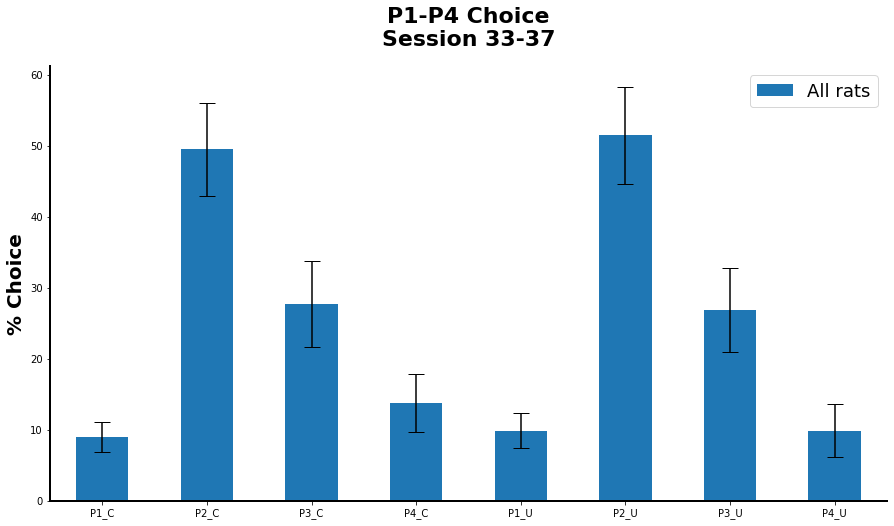

In [11]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM, task = 'choiceRGT')

#to save this figure (or any other figure):
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

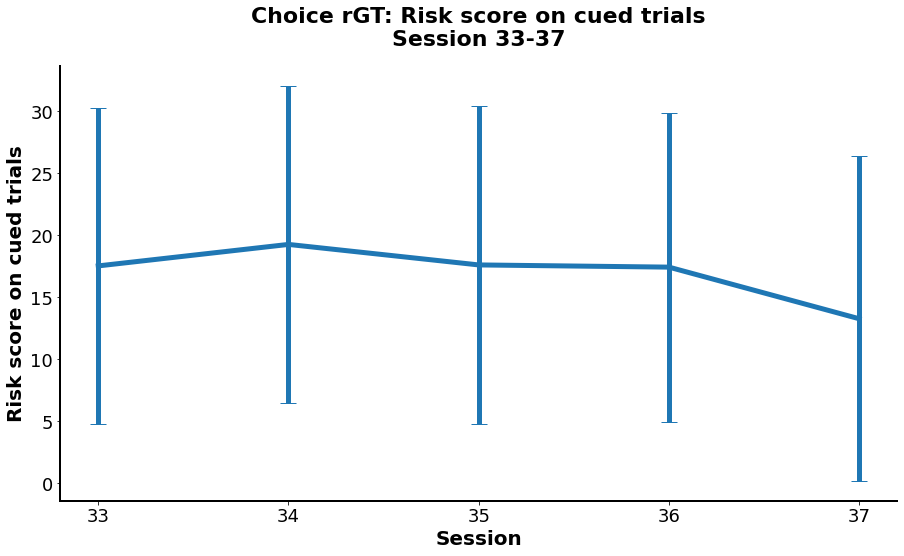

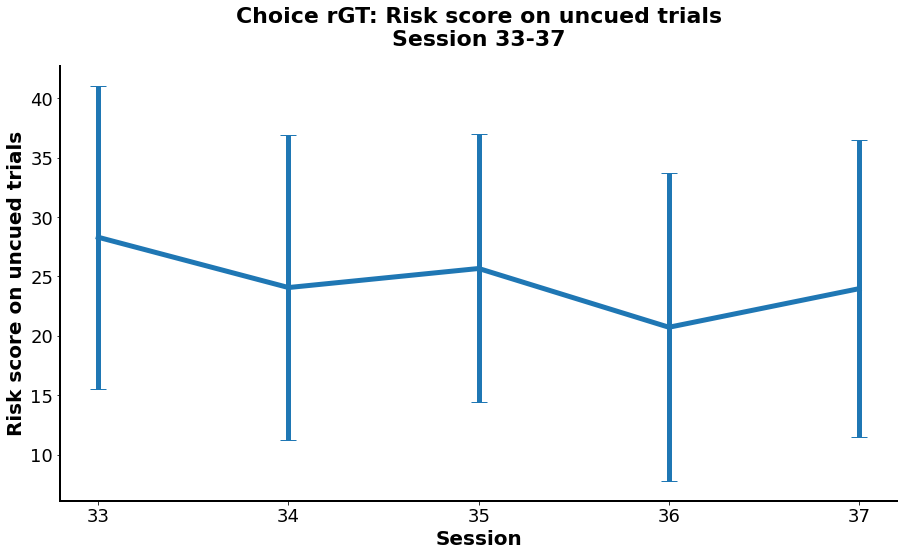

In [16]:
rgt.rgt_plot('risk_cued_', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score on cued trials') 
rgt.rgt_plot('risk_uncued_', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score on uncued trials') 

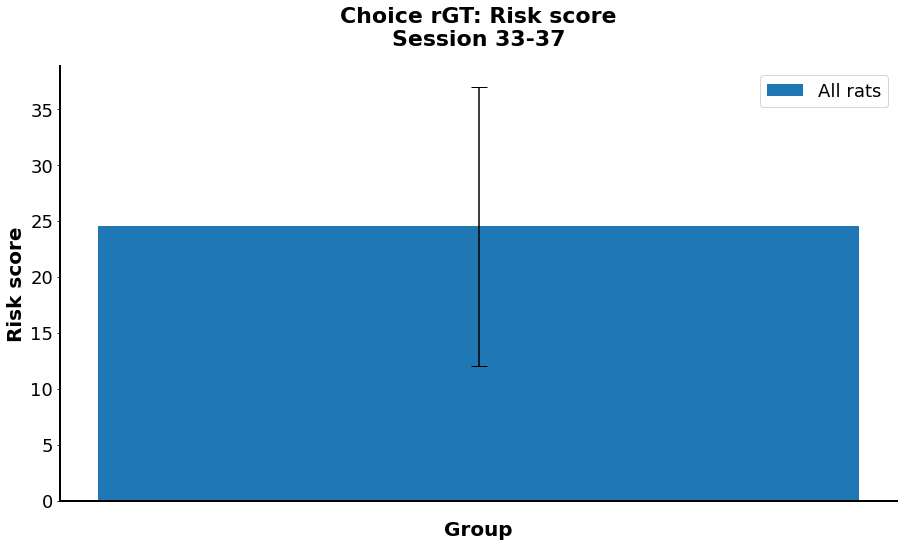

In [13]:
rgt.rgt_bar_plot('risk_uncued_', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score') #changeable to 'risk_cued_'

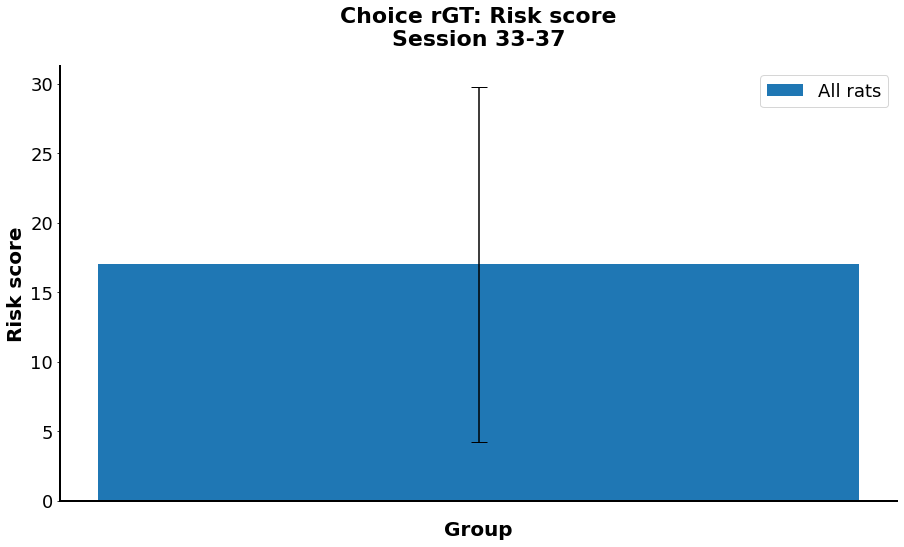

In [14]:
rgt.rgt_bar_plot('risk_cued_', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score') #changeable to 'risk_cued_'

## Plotting by risk status

In [ ]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

In [ ]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, y_label = 'Risk score') 

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')